# Scientific Workflow for Data Science Example

Author: Alexander Schindler (AIT/TU Wien)

Data analysis part from akquinet: Predicting House Prices On Kaggle: A Gentle Introduction To Data Science – [Part I](https://blog.akquinet.de/2017/09/19/predicting-house-prices-on-kaggle-part-i/) and [Part II](https://blog.akquinet.de/2017/10/25/predicting-house-prices-on-kaggle-a-gentle-introduction-to-data-science-part-ii/)

# Jupyter Notebook

* Interactive Python shell within the browser
* Different *Kernels*: Python, R, Julia, ... , more than 70 programming languages
* Word processor
* Rendering engine

**Advantages:**

* reproducable research
* documentation of processes
* fast prototyping / brainstorming
* export functions to HTML, PDF, Latex, ...
    * e.g. create reports, scientific papers
    
**Disadvantage**

* can lead to messy code
* requires structured appraoch & constant restructuring & cleaning
* can lead to untested code
    * not advised to use notebook code in production
    
**Notebook Extensions**

* help to structure code
    * table of contents
    * hide code cells ==> better overview of insights gained, line of argumentation, current status

**Recommendations**

* structure an experiment like a paper
    * introduction / motivation
    * data
    * method
    * experiments / implementation
    * evaluation
        * tables
        * charts, plots
    * conclusions
    * future work / ideas

# Data Science Example

* Simple example
* show some typical issues and steps 
* data-driven experiment / evaluation
* intentional limitations to simulate common scenarios

# Data Processing Libraries

In [190]:
# Numeric processing
import numpy as np

# in-memory data structures
import pandas as pd

# standard plotting library
import matplotlib.pyplot as plt

# prettify plots
import seaborn as sns

# embedd plots in notebook
%matplotlib inline

# Data


## House Prices: Advanced Regression Techniques

Predict sales price a house in Ames, Iowa, USA.

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

![Kaggle-Datset Image](https://kaggle2.blob.core.windows.net/competitions/kaggle/5407/media/housesbanner.png "")

### Load Data

In [191]:
DATA_ROOT_DIR         = "./data"

DATASET_PATH_TRAIN    = "%s/train.csv.gz" % DATA_ROOT_DIR
DATASET_PATH_TEST     = "%s/test.csv.gz"  % DATA_ROOT_DIR

DATA_DESCRIPTION_FILE = "%s/data_description.txt" % DATA_ROOT_DIR

read the csv-data-file

**Train Data**

In [192]:
data_train = pd.read_csv(DATASET_PATH_TRAIN, compression="gzip", index_col=0)

data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [193]:
data_train.shape

(1460, 80)

**Test Data**

In [194]:
data_test = pd.read_csv(DATASET_PATH_TEST, compression="gzip", index_col=0)

data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [195]:
data_test.shape

(1459, 79)

In [196]:
np.setdiff1d(data_train.columns, data_test.columns)

array(['SalePrice'], dtype=object)

**Data description Lookup table**

read the data description file

In [197]:
data_description_dictionary = {}

with open(DATA_DESCRIPTION_FILE) as dsf:
    for line in dsf:
        if (line.find(":") != -1) & (line.find("\t") == -1):
            abbreviation, description = line.split(":",1)
            data_description_dictionary[abbreviation.strip()] = description.strip()

In [198]:
data_description_dictionary["MSZoning"]

'Identifies the general zoning classification of the sale.'

## Get a Feel for the Data

**Data composition**

* Data types
* Attribute names - semantically indicating?

In [199]:
# create a list of data-types for a quick analysis
data_train_types = pd.DataFrame(data_train.dtypes, columns=["type"]).reset_index()
data_train_types

,index,type
0,MSSubClass,int64
1,MSZoning,object
2,LotFrontage,float64
3,LotArea,int64
4,Street,object
5,Alley,object
6,LotShape,object
7,LandContour,object
8,Utilities,object
9,LotConfig,object


What are the most frequent data-types?

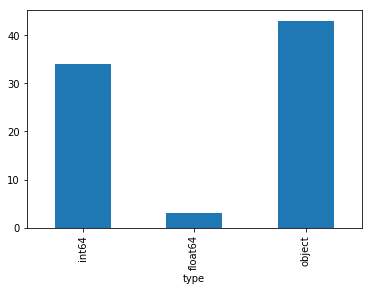

In [200]:
data_train_types.groupby("type").count().plot(kind='bar', legend=False);

### Integers

What are Int-values used for?

* counting
* measuring (areas/m²)
* annual disclosures (construction year)
* monetary values (price)

In [201]:
int_values = data_train_types[data_train_types["type"] == "int64"]["index"].values

data_train[int_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
OverallQual,7,6,7,7,8,5,8,7,7,5,...,5,8,5,5,7,6,6,7,5,5
OverallCond,5,8,5,5,5,5,5,6,5,6,...,5,5,5,5,5,5,6,9,6,6
YearBuilt,2003,1976,2001,1915,2000,1993,2004,1973,1931,1939,...,1974,2008,2005,2006,2004,1999,1978,1941,1950,1965
YearRemodAdd,2003,1976,2002,1970,2000,1995,2005,1973,1950,1950,...,1974,2009,2005,2006,2005,2000,1988,2006,1996,1965
BsmtFinSF1,706,978,486,216,655,732,1369,859,0,851,...,0,0,547,0,410,0,790,275,49,830
BsmtFinSF2,0,0,0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,163,0,1029,290
BsmtUnfSF,150,284,434,540,490,64,317,216,952,140,...,896,1573,0,1140,811,953,589,877,0,136
TotalBsmtSF,856,1262,920,756,1145,796,1686,1107,952,991,...,896,1573,547,1140,1221,953,1542,1152,1078,1256


### Floats

What are floats used for?

* apparently used as integers
* maybe wrong interpretation by csv-reader?
* could be converted to integers? (caution! check first! every transformation could destroy information)

In [202]:
float_values = data_train_types[data_train_types["type"] == "float64"]["index"].values

data_train[float_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
LotFrontage,65.000,80.000,68.000,60.000,84.000,85.000,75.000,nan,51.000,50.000,...,60.000,78.000,35.000,90.000,62.000,62.000,85.000,66.000,68.000,75.000
MasVnrArea,196.000,0.000,162.000,0.000,350.000,0.000,186.000,240.000,0.000,0.000,...,0.000,194.000,80.000,0.000,0.000,0.000,119.000,0.000,0.000,0.000
GarageYrBlt,2003.000,1976.000,2001.000,1998.000,2000.000,1993.000,2004.000,1973.000,1931.000,1939.000,...,nan,2008.000,2005.000,nan,2004.000,1999.000,1978.000,1941.000,1950.000,1965.000


### Objects

What are objects used for?

* Strings
* apparently categorical data
* no freetext recognizable

In [203]:
object_values = data_train_types[data_train_types["type"] == "object"]["index"].values

data_train[object_values].T

Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,...,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,IR1,Reg,Reg,...,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,...,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,...,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Corner,Inside,Corner,...,FR2,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,...,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,NWAmes,OldTown,BrkSide,...,NAmes,Somerst,Edwards,Mitchel,Somerst,Gilbert,NWAmes,Crawfor,NAmes,Edwards
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,PosN,Artery,Artery,...,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm


#### Check assumption that strings represent categorical data and not Freetext

* count unique values for each attribute

In [204]:
data_train[object_values].apply(lambda x : x.unique().shape[0]).sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType1      7
GarageType        7
BsmtFinType2      7
RoofStyle         6
Heating           6
SaleCondition     6
Electrical        6
FireplaceQu       6
GarageQual        6
GarageCond        6
Foundation        6
MasVnrType        5
BldgType          5
LotConfig         5
BsmtQual          5
MSZoning          5
ExterCond         5
BsmtCond          5
BsmtExposure      5
HeatingQC         5
MiscFeature       5
Fence             5
LotShape          4
LandContour       4
ExterQual         4
GarageFinish      4
KitchenQual       4
PoolQC            4
PavedDrive        3
LandSlope         3
Alley             3
Utilities         2
CentralAir        2
Street            2
dtype: int64

**Example of categorical Data**

In [205]:
data_train.Exterior2nd.unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

# Data Exploration and Visualization

### Data Value Ranges

* how are the value ranges within the attributes?
* how are the value ranges between the attributes?

In [206]:
data_train[int_values.tolist() + float_values.tolist()].describe().T.sort_values("mean")

,count,mean,std,min,25%,50%,75%,max
BsmtHalfBath,1460.000,0.058,0.239,0.000,0.000,0.000,0.000,2.000
HalfBath,1460.000,0.383,0.503,0.000,0.000,0.000,1.000,2.000
BsmtFullBath,1460.000,0.425,0.519,0.000,0.000,0.000,1.000,3.000
Fireplaces,1460.000,0.613,0.645,0.000,0.000,1.000,1.000,3.000
KitchenAbvGr,1460.000,1.047,0.220,0.000,1.000,1.000,1.000,3.000
FullBath,1460.000,1.565,0.551,0.000,1.000,2.000,2.000,3.000
GarageCars,1460.000,1.767,0.747,0.000,1.000,2.000,2.000,4.000
PoolArea,1460.000,2.759,40.177,0.000,0.000,0.000,0.000,738.000
BedroomAbvGr,1460.000,2.866,0.816,0.000,2.000,3.000,3.000,8.000
3SsnPorch,1460.000,3.410,29.317,0.000,0.000,0.000,0.000,508.000


**Range of the entire data-space - only independant values**

In [207]:
mask = int_values.tolist() + float_values.tolist()
mask.remove("SalePrice")

data_train[mask].describe().T.describe()[["min", "max", "mean"]]

,min,max,mean
count,36.000,36.000,36.000
mean,270.611,7627.667,682.486
std,637.374,35710.993,1814.787
min,0.000,2.000,0.058
25%,0.000,9.750,3.274
50%,0.000,562.000,45.019
75%,6.500,2010.000,496.545
max,2006.000,215245.000,10516.828


**Frequency Distribution of target variable**

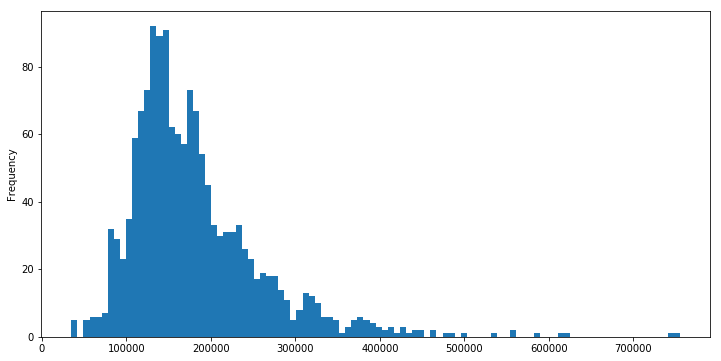

In [208]:
data_train.SalePrice.plot(kind='hist', bins=100, figsize=(12,6));

In [209]:
data_train.SalePrice.describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

# Missing Values

Visualize with Seaborn Heatmap

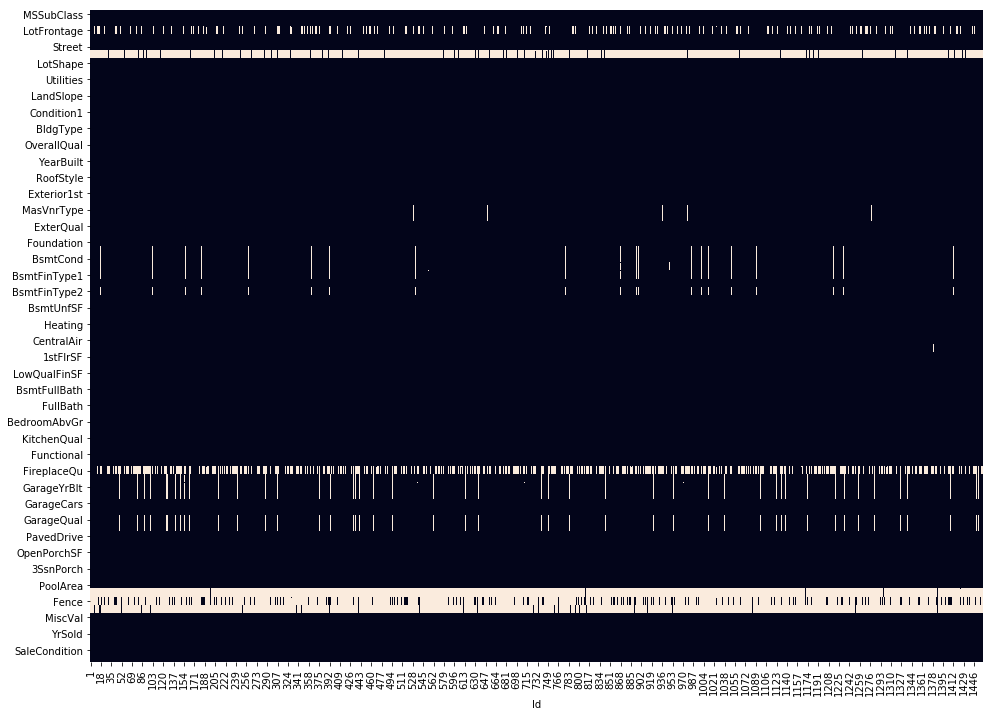

In [210]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(data_train.T.isnull(), cbar=False);

Visualize with [missingno](https://github.com/ResidentMario/missingno) library

In [211]:
import missingno as msno

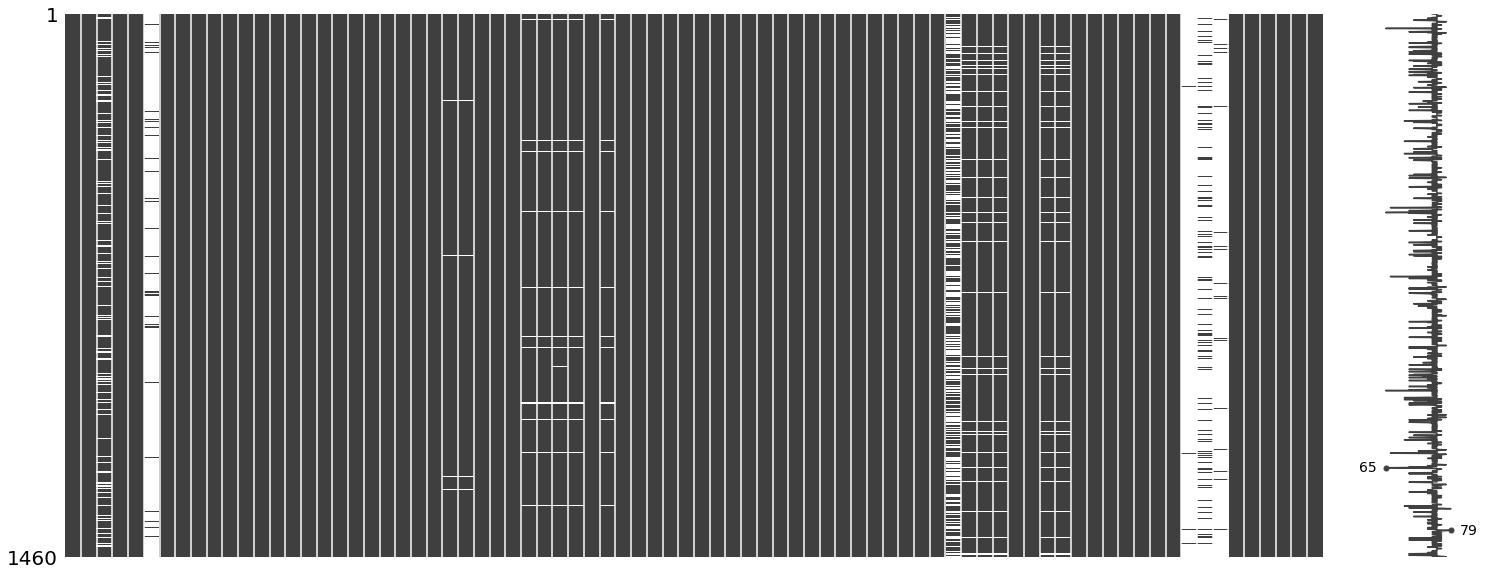

In [212]:
msno.matrix(data_train);

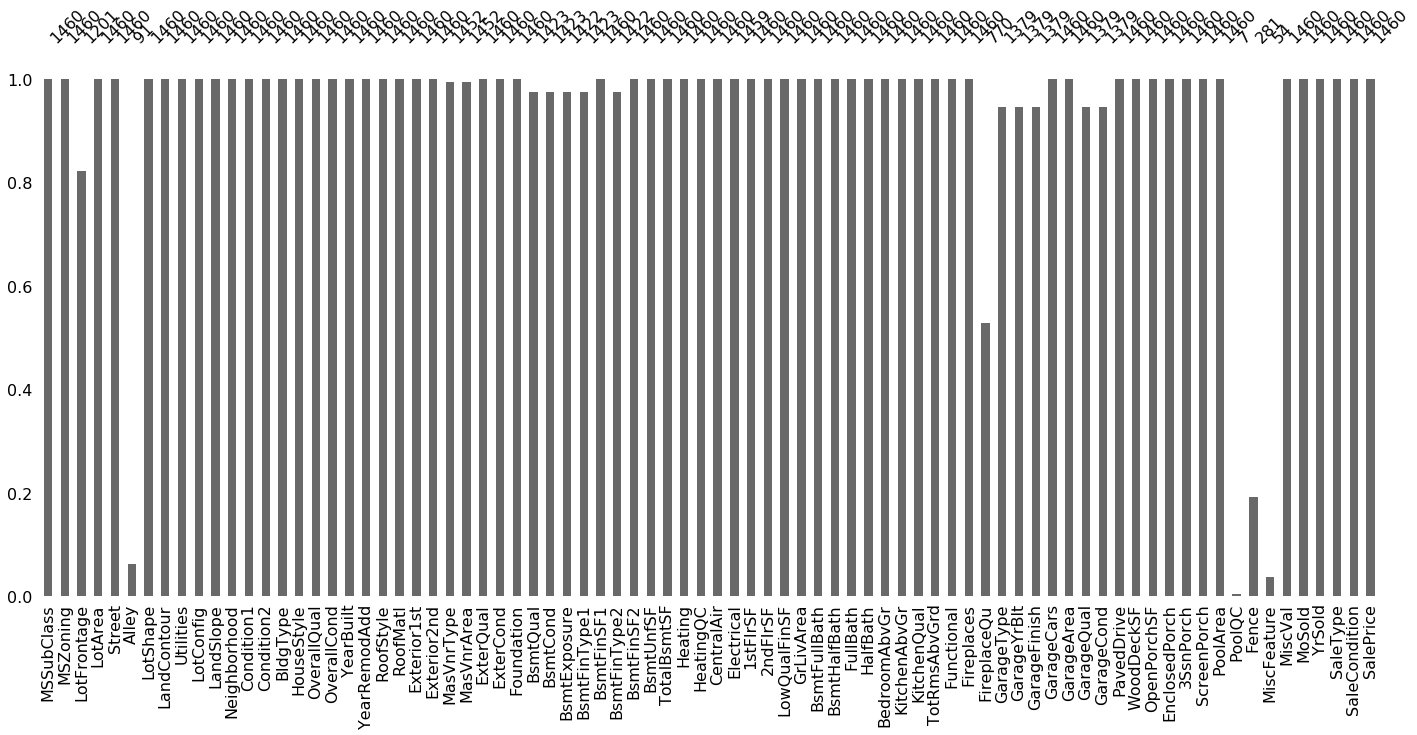

In [213]:
msno.bar(data_train);

In [214]:
attributes_with_missing_data = data_train.isnull().sum(axis=0)
attributes_with_missing_data = attributes_with_missing_data[attributes_with_missing_data > 0]
attributes_with_missing_data = pd.DataFrame(attributes_with_missing_data, columns=["num_nans"])
attributes_with_missing_data.sort_values("num_nans", ascending=False)

,num_nans
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81


In [215]:
attributes_with_missing_data_types = data_train_types.set_index("index").loc[attributes_with_missing_data.index]
attributes_with_missing_data       = attributes_with_missing_data.join(attributes_with_missing_data_types)

In [216]:
attributes_with_missing_data.sort_values(["type", "num_nans"], ascending=True)

,num_nans,type
MasVnrArea,8,float64
GarageYrBlt,81,float64
LotFrontage,259,float64
Electrical,1,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtFinType1,37,object
BsmtExposure,38,object
BsmtFinType2,38,object


### Missing Values - Conclusion

* Most of attributes with missing values are categorical variables
  * no processing required => will be solved implicetly by processing categorical values
* 3 numerical variables with missing values
  * 2 area measures, 1 temporal

# Missing Value Handling

These numerical values need to be handled:

In [217]:
attributes_with_missing_data[attributes_with_missing_data["type"] == "float64"].sort_values(["type", "num_nans"], ascending=False)

,num_nans,type
LotFrontage,259,float64
GarageYrBlt,81,float64
MasVnrArea,8,float64


### LotFrontage

In [218]:
data_description_dictionary["LotFrontage"]

'Linear feet of street connected to property'

This description is problematic.

* Does a missing values indicate
  * there is no connected path available (length=0)
  * this value has not been sampled / is unkown

**Check Distribution**

* No 0-valued entries.
  * unlikely that NAN represents "no path available"
* shortest path = 21 feet, average 70 feet.

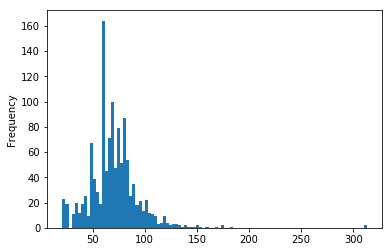

In [219]:
data_train.LotFrontage.plot(kind='hist', bins=100);

In [220]:
data_train.LotFrontage.describe()

count   1201.000
mean      70.050
std       24.285
min       21.000
25%       59.000
50%       69.000
75%       80.000
max      313.000
Name: LotFrontage, dtype: float64

**Decission**

**Option 1**

* Fill missing data with global mean values

**Option 2**

* Fill missing data with mean values with respect to related attributes

In [221]:
lot_attributes = data_train.columns[data_train.columns.str.lower().str.contains("lot")].values
lot_attributes

array(['LotFrontage', 'LotArea', 'LotShape', 'LotConfig'], dtype=object)

In [222]:
nan_idx = data_train[data_train.LotFrontage.isnull()].index

data_train.loc[nan_idx, lot_attributes].head(30)

,LotFrontage,LotArea,LotShape,LotConfig
Id,,,,
8,nan,10382,IR1,Corner
13,nan,12968,IR2,Inside
15,nan,10920,IR1,Corner
17,nan,11241,IR1,CulDSac
25,nan,8246,IR1,Inside
32,nan,8544,IR1,CulDSac
43,nan,9180,IR1,CulDSac
44,nan,9200,IR1,CulDSac
51,nan,13869,IR2,Corner


In [223]:
for idx in nan_idx:
    
    mean_for_category = data_train[data_train.LotConfig == data_train.loc[idx].LotConfig].LotFrontage.mean()
    
    data_train.loc[idx, "LotFrontage"] = mean_for_category

In [224]:
data_train.loc[nan_idx, lot_attributes].head(30)

,LotFrontage,LotArea,LotShape,LotConfig
Id,,,,
8,84.040,10382,IR1,Corner
13,67.716,12968,IR2,Inside
15,84.040,10920,IR1,Corner
17,59.911,11241,IR1,CulDSac
25,67.716,8246,IR1,Inside
32,59.911,8544,IR1,CulDSac
43,59.911,9180,IR1,CulDSac
44,59.911,9200,IR1,CulDSac
51,84.040,13869,IR2,Corner


### GarageYrBlt

In [225]:
data_description_dictionary["GarageYrBlt"]

'Year garage was built'

Again, this description is ambigious:

* does NAN correspond with the absence of a garage?
* or is this information not available?

**Cross-check with other attributes**

In [226]:
garage_attributes = data_train.columns[data_train.columns.str.lower().str.contains("garage")].values
garage_attributes

array(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond'], dtype=object)

In [227]:
nan_idx = data_train.GarageYrBlt.isnull()

In [228]:
data_train.loc[nan_idx, garage_attributes]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,nan,NaN,0,0,NaN,NaN
49,NaN,nan,NaN,0,0,NaN,NaN
79,NaN,nan,NaN,0,0,NaN,NaN
89,NaN,nan,NaN,0,0,NaN,NaN
90,NaN,nan,NaN,0,0,NaN,NaN
100,NaN,nan,NaN,0,0,NaN,NaN
109,NaN,nan,NaN,0,0,NaN,NaN
126,NaN,nan,NaN,0,0,NaN,NaN
128,NaN,nan,NaN,0,0,NaN,NaN


In [229]:
data_train.loc[nan_idx, garage_attributes].sum(axis=0)

GarageType       nan
GarageYrBlt      nan
GarageFinish     nan
GarageCars     0.000
GarageArea     0.000
GarageQual       nan
GarageCond       nan
dtype: float64

In [230]:
data_train[data_train.GarageArea == 0][garage_attributes].shape

(81, 7)

**Conclusion**

* NAN values correspond with the absence of a garage
* No problem for the corresponding categorical attributes
* How to model the construction year of a missing garage?

**Solution: Transform to categorical data**

Define decades of construction years

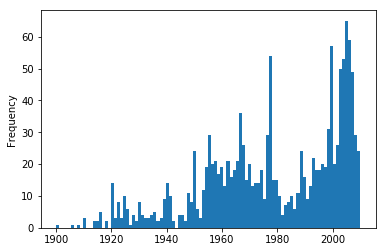

In [231]:
data_train.GarageYrBlt.plot(kind='hist', bins=100);

In [232]:
data_train.GarageYrBlt.describe()

count   1379.000
mean    1978.506
std       24.690
min     1900.000
25%     1961.000
50%     1980.000
75%     2002.000
max     2010.000
Name: GarageYrBlt, dtype: float64

In [233]:
bins = [1900,1950,1960,1970,1980,1990,2000,2010]

In [234]:
GarageYrBlt_categorical = pd.cut(data_train.GarageYrBlt, bins)
GarageYrBlt_categorical.head()

Id
1    (2000, 2010]
2    (1970, 1980]
3    (2000, 2010]
4    (1990, 2000]
5    (1990, 2000]
Name: GarageYrBlt, dtype: category
Categories (7, interval[int64]): [(1900, 1950] < (1950, 1960] < (1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010]]

In [235]:
GarageYrBlt_categorical_encoded = pd.get_dummies(GarageYrBlt_categorical, prefix="GarageYrBlt_")
GarageYrBlt_categorical_encoded.head()

,"GarageYrBlt__(1900, 1950]","GarageYrBlt__(1950, 1960]","GarageYrBlt__(1960, 1970]","GarageYrBlt__(1970, 1980]","GarageYrBlt__(1980, 1990]","GarageYrBlt__(1990, 2000]","GarageYrBlt__(2000, 2010]"
Id,,,,,,,
1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0


In [236]:
data_train = data_train.join(GarageYrBlt_categorical_encoded)
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,"GarageYrBlt__(1900, 1950]","GarageYrBlt__(1950, 1960]","GarageYrBlt__(1960, 1970]","GarageYrBlt__(1970, 1980]","GarageYrBlt__(1980, 1990]","GarageYrBlt__(1990, 2000]","GarageYrBlt__(2000, 2010]"
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,0,0,0,0,0,0,1
2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,0,0,0,1,0,0,0
3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,0,0,0,0,0,0,1
4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,WD,Abnorml,140000,0,0,0,0,0,1,0
5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,0,0,0,0,0,1,0


Visual inspection of value range

In [237]:
data_train.drop("GarageYrBlt", inplace=True, axis=1)

## MasVnrArea

In [238]:
data_description_dictionary["MasVnrArea"] # Google translates this to "Mauerwerk Furnierfläche in Quadratfuß"

'Masonry veneer area in square feet'

In [239]:
data_train["MasVnrArea"] = data_train["MasVnrArea"].fillna(data_train.MasVnrArea.mean())

# Handling of Categorical Values

### Quick overview of all categorical attributes

In [240]:
cat_values_overview = data_train[object_values].apply(lambda x : x.unique().shape[0]).sort_values(ascending=False)
cat_values_overview = pd.DataFrame(cat_values_overview, columns=["num categories"])
cat_values_overview["description"] = [data_description_dictionary[x] for x in cat_values_overview.index]
cat_values_overview["values"] = [data_train[x].unique() for x in cat_values_overview.index]
cat_values_overview

,num categories,description,values
Neighborhood,25,Physical locations within Ames city limits,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..."
Exterior2nd,16,Exterior covering on house (if more than one m...,"[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ..."
Exterior1st,15,Exterior covering on house,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ..."
SaleType,9,Type of sale,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ..."
Condition1,9,Proximity to various conditions,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ..."
Condition2,8,Proximity to various conditions (if more than ...,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, ..."
HouseStyle,8,Style of dwelling,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,..."
RoofMatl,8,Roof material,"[CompShg, WdShngl, Metal, WdShake, Membran, Ta..."
Functional,7,Home functionality (Assume typical unless dedu...,"[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]"
BsmtFinType1,7,Rating of basement finished area,"[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]"


In [241]:
cat_values_overview.shape

(43, 3)

**Convert to 'categorical' pandas datatype**

In [242]:
for column_name in data_train[object_values]:
    data_train[column_name] = data_train[column_name].astype("category")

### Encode categorical values

In [243]:
data_train_cat = pd.get_dummies(data_train[object_values])
data_train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


## Bivariate analysis

**Simple plotting**

* e.g. identify correlations

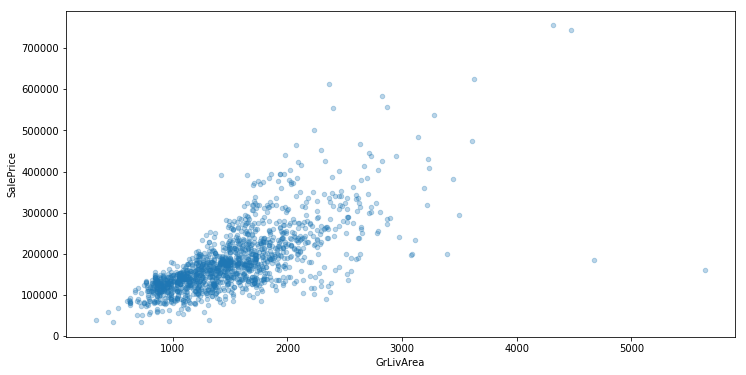

In [244]:
data_train.plot(kind='scatter', x="GrLivArea", y="SalePrice", alpha=0.3, figsize=(12,6));

**Color Coding additional information**

* identify further relationships (e.g. patterns, clusters, etc.)

In [245]:
import matplotlib._color_data as mcd

colors = list(mcd.XKCD_COLORS.keys())[::-35]

In [246]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder = encoder.fit(data_train.KitchenQual)

kitchenquality_encoded = encoder.transform(data_train.KitchenQual)

In [247]:
kitchenquality_colors = [colors[int(l)] for l in kitchenquality_encoded]

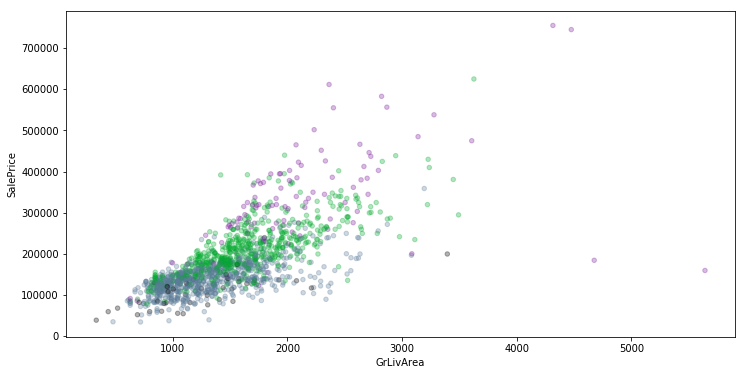

In [248]:
data_train.plot(kind='scatter', x="GrLivArea", y="SalePrice", alpha=0.3, figsize=(12,6), c=kitchenquality_colors);

**Plot pairwise relationships**

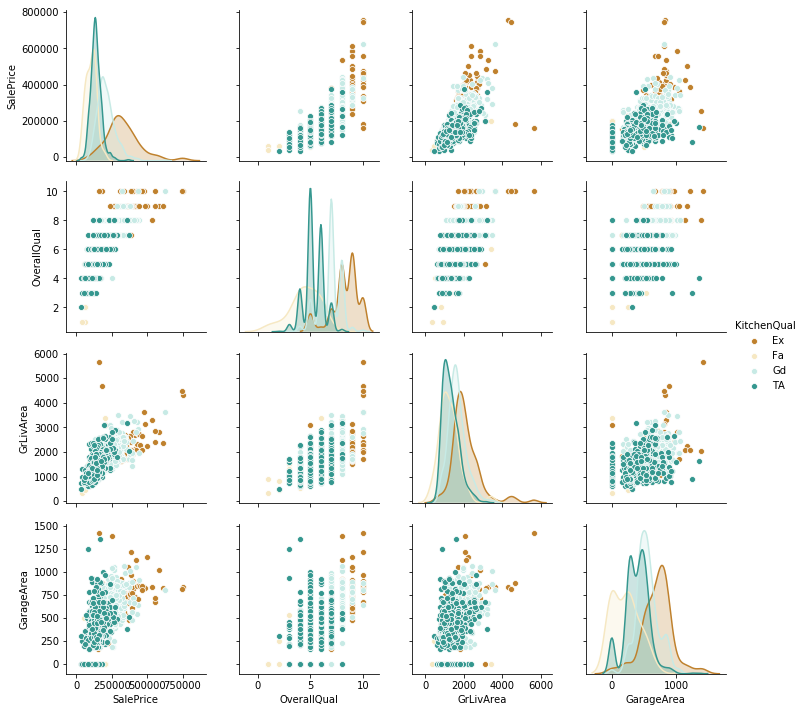

In [249]:
sns.pairplot(data_train, vars=["SalePrice", "OverallQual", "GrLivArea", "GarageArea"], hue="KitchenQual", palette="BrBG");

### Categorical Values

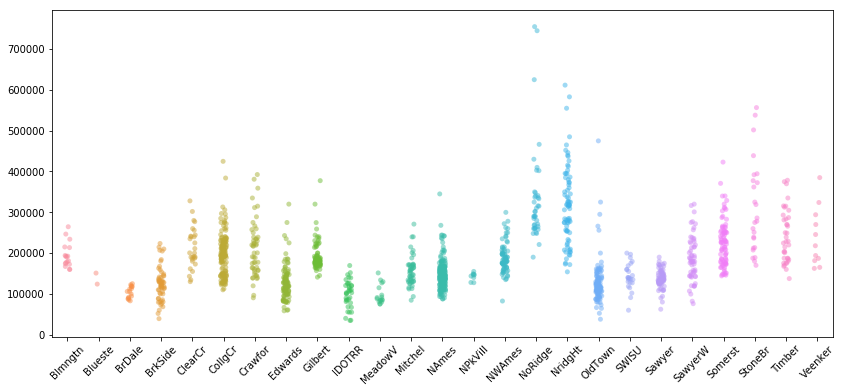

In [250]:
fig, ax = plt.subplots(figsize=(14,6))
sns.stripplot(x      = data_train.Neighborhood.values, 
              y      = data_train.SalePrice.values,
              order  = np.sort(data_train.Neighborhood.unique()),
              jitter = 0.1, 
              alpha  = 0.5, 
              ax     = ax);
 
plt.xticks(rotation=45);

Sort by mean sales price per neighborhood

In [251]:
Neighborhood_meanSP = data_train.groupby('Neighborhood')['SalePrice'].mean()

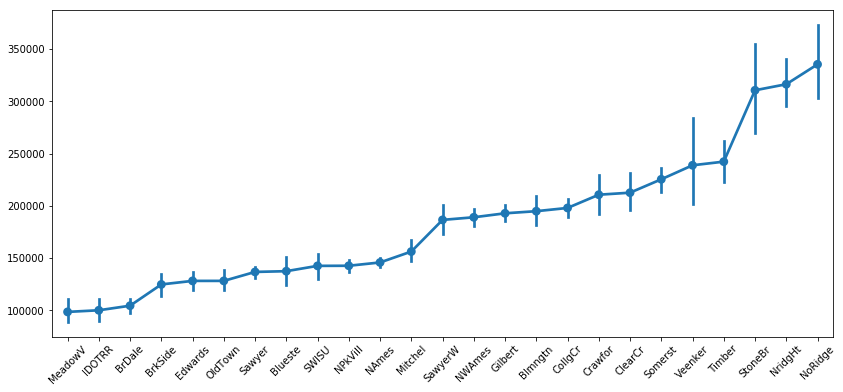

In [252]:
fig, ax = plt.subplots(figsize=(14,6))
sns.pointplot(x      = data_train.Neighborhood.values, 
              y      = data_train.SalePrice.values,
              order  = Neighborhood_meanSP.sort_values().index)
 
plt.xticks(rotation=45);

# Preparing Feature-Space

Add encoded categorical data to source data

In [253]:
X = data_train.join(data_train_cat)

Remove original categorical data

In [254]:
X.drop(object_values, axis=1, inplace=True)

In [255]:
X.shape

(1460, 295)

define target variable

In [256]:
Y = X.SalePrice

Remove target values from training data

# Correlations with target variable

In [257]:
# calculate correlations
corr_matrix = X.corr()
# take magnitude of correlation
corr_matrix = corr_matrix.abs()
# sort one axis by magnitude of correlation
corr_matrix = corr_matrix.sort_values("SalePrice", ascending=False)
# sort other axis by magnitude of correlation
corr_matrix = corr_matrix.T.sort_values("SalePrice", ascending=False).T

corr_matrix.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,ExterQual_TA,FullBath,BsmtQual_Ex,...,Condition1_RRNe,LotConfig_Corner,BldgType_TwnhsE,Condition2_RRAe,Foundation_Wood,GarageCond_Gd,"GarageYrBlt__(1980, 1990]",RoofStyle_Mansard,RoofMatl_Metal,BsmtFinType2_GLQ
SalePrice,1.000,0.791,0.709,0.640,0.623,0.614,0.606,0.589,0.561,0.553,...,0.005,0.004,0.004,0.003,0.003,0.001,0.000,0.000,0.000,0.000
OverallQual,0.791,1.000,0.593,0.601,0.562,0.538,0.476,0.646,0.551,0.471,...,0.011,0.008,0.129,0.021,0.019,0.012,0.017,0.005,0.002,0.002
GrLivArea,0.709,0.593,1.000,0.467,0.469,0.455,0.566,0.386,0.630,0.310,...,0.015,0.064,0.113,0.055,0.031,0.010,0.003,0.061,0.026,0.016
GarageCars,0.640,0.601,0.467,1.000,0.882,0.435,0.439,0.482,0.470,0.356,...,0.012,0.020,0.067,0.008,0.014,0.001,0.049,0.008,0.008,0.002
GarageArea,0.623,0.562,0.469,0.882,1.000,0.487,0.490,0.445,0.406,0.370,...,0.001,0.030,0.003,0.016,0.017,0.009,0.068,0.003,0.008,0.014


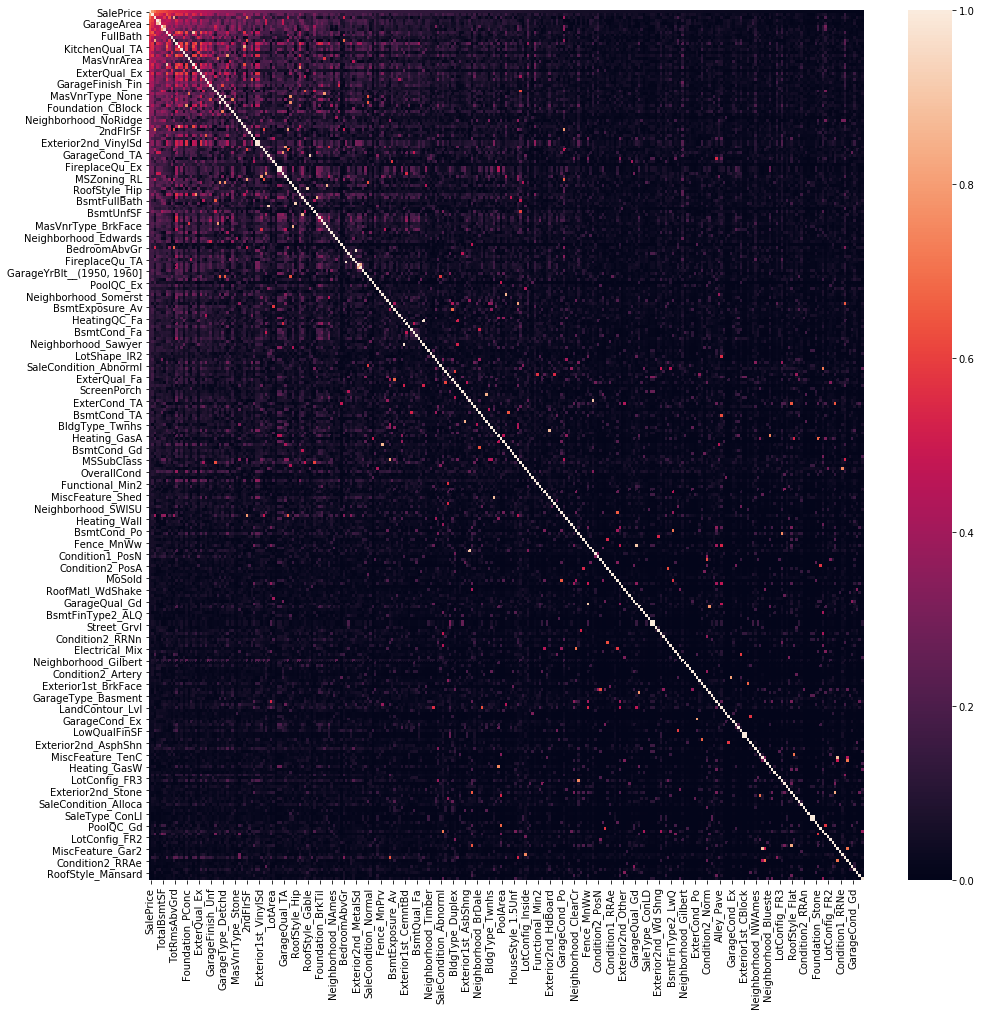

In [258]:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corr_matrix);

# Define model for prediction

## Validation using StratifiedShuffleSplit

In [259]:
from sklearn.model_selection import StratifiedKFold

In [260]:
# define Splitter
skf = StratifiedKFold(n_splits  = 10, shuffle=True)

Quick debug of K-Fold splits

In [261]:
fold = 1

for train_idx, test_idx in skf.split(X, data_train.KitchenQual):
    
    print("Fold: %d" % fold)
    print("Train-data:", X.iloc[train_idx].shape)
    print("Test-data :", X.iloc[test_idx].shape)
    
    fold += 1

Fold: 1
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 2
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 3
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 4
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 5
Train-data: (1313, 295)
Test-data : (147, 295)
Fold: 6
Train-data: (1314, 295)
Test-data : (146, 295)
Fold: 7
Train-data: (1315, 295)
Test-data : (145, 295)
Fold: 8
Train-data: (1315, 295)
Test-data : (145, 295)
Fold: 9
Train-data: (1315, 295)
Test-data : (145, 295)
Fold: 10
Train-data: (1316, 295)
Test-data : (144, 295)


## Training a simple model

In [262]:
X.drop("SalePrice", axis=1, inplace=True)

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [264]:
# define Splitter
skf = StratifiedKFold(n_splits  = 10, shuffle=True, random_state=0)

In [265]:
fold_results = []

for train_idx, test_idx in skf.split(X, data_train.Neighborhood):
    
    pca = PCA(n_components=200, svd_solver='full')
    pca.fit(X.iloc[train_idx].values)
    
    model = LinearRegression(normalize=False)
    model.fit(pca.transform(X.iloc[train_idx]), Y.iloc[train_idx])
    
    y_true = Y.iloc[test_idx].values
    
    y_pred = model.predict(pca.transform(X.iloc[test_idx]))
    
    fold_results.append([y_true, y_pred])

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [266]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [267]:
eval_mse = [mean_squared_error(y_true, y_pred) for y_true, y_pred in fold_results]
eval_mae = [mean_absolute_error(y_true, y_pred) for y_true, y_pred in fold_results]
eval_r2  = [r2_score(y_true, y_pred) for y_true, y_pred in fold_results]

In [268]:
result_table         = pd.DataFrame([np.mean(eval_mse), np.mean(eval_mae), np.mean(eval_r2)]).T
result_table.columns = ["mse mean", "mae mean", "r2 mean"]

pd.set_option('display.float_format', lambda x: '%.3f' % x)
result_table

,mse mean,mae mean,r2 mean
0,1218468448.570,19100.988,0.798


predict test data

### Evaluating further models

In [269]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [270]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

In [271]:
model = Ridge(alpha=0.7, normalize=True, solver='svd')

results = cross_validate(model, X, Y, data_train.Neighborhood, cv=skf, scoring={'r2' : make_scorer(r2_score),
                                                                                'mse': make_scorer(mean_squared_error),
                                                                                'mae': make_scorer(mean_absolute_error)})

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [272]:
result_ridge = pd.DataFrame(np.array([results["test_mse"], results["test_mae"], results["test_r2"]]).T, columns=["mse", "mae", "r2"]).mean(axis=0)
result_ridge

mse   1542031217.755
mae        16315.315
r2            -0.108
dtype: float64

In [273]:
model = Lasso(alpha=0.5, normalize=True)

results = cross_validate(model, X, Y, data_train.Neighborhood, cv=skf, scoring={'r2' : make_scorer(r2_score),
                                                                                'mse': make_scorer(mean_squared_error),
                                                                                'mae': make_scorer(mean_absolute_error)})

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective di

In [274]:
result_lasso = pd.DataFrame(np.array([results["test_mse"], results["test_mae"], results["test_r2"]]).T, columns=["mse", "mae", "r2"]).mean(axis=0)
result_lasso

mse   1898780202.417
mae        16584.259
r2            -0.433
dtype: float64

In [275]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

In [276]:
# reduce number of folds for the presentation (it takes long to compute)
skf = StratifiedKFold(n_splits  = 4, shuffle=True)

svr_pipeline = make_pipeline(StandardScaler(),  SVR(kernel='linear', C=1e3))

results = cross_validate(svr_pipeline, X, Y, data_train.Neighborhood, cv=skf, scoring={'r2' : make_scorer(r2_score),
                                                                                'mse': make_scorer(mean_squared_error),
                                                                                'mae': make_scorer(mean_absolute_error)})

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


In [277]:
result_svr = pd.DataFrame(np.array([results["test_mse"], results["test_mae"], results["test_r2"]]).T, columns=["mse", "mae", "r2"]).mean(axis=0)
result_svr

mse   1196408609.286
mae        17321.428
r2             0.806
dtype: float64

# Evaluation Results

In [278]:
eval_result_table = pd.DataFrame(np.concatenate([result_table.values, [result_lasso.values], [result_lasso.values], [result_svr.values]], axis=0), columns=["mse mean", "mae mean", "r2 mean"])
eval_result_table.index = ["linear regression", "ridge", "lasso", "svr"]
eval_result_table

,mse mean,mae mean,r2 mean
linear regression,1218468448.570,19100.988,0.798
ridge,1898780202.417,16584.259,-0.433
lasso,1898780202.417,16584.259,-0.433
svr,1196408609.286,17321.428,0.806


In [279]:
eval_result_table.sort_values("mae mean", ascending=True)

,mse mean,mae mean,r2 mean
ridge,1898780202.417,16584.259,-0.433
lasso,1898780202.417,16584.259,-0.433
svr,1196408609.286,17321.428,0.806
linear regression,1218468448.570,19100.988,0.798
